# Introduction
 
Atmospheric $CO_{2}$ has been rising at approximately 9 billion tonnes each year (Byrne, 2014), resulting in a 30% increase in acidity in oceans (National Oceanic and Atmospheric Administration, 2020). The ocean’s average pH is now alkaline at around 8.10. However, the pH is projected to decrease to values between 8.05 and 7.75 by the end of the 21st century (European Environment Agency, 2021).

Summary image on the dissolution of CO2 in seawater: 
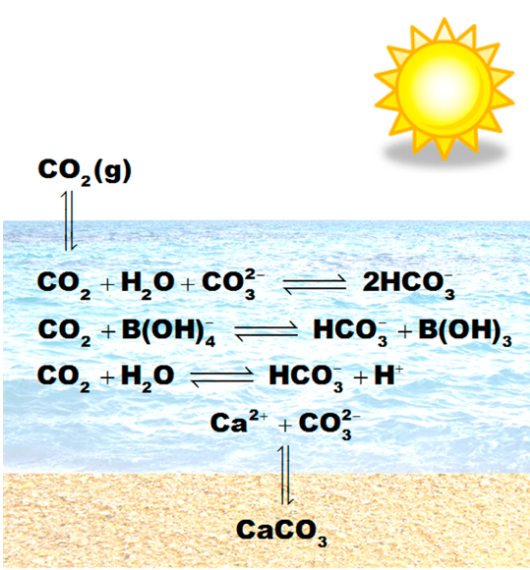

This drastic increase in ocean acidification can have devastating impacts on the marine ecosystem that is sensitive to even slight fluctuations in pH. With increased concentrations of $H^{+}$ ions that come with decreased pH, a lower concentration of $CO_{3}^{2-}$ ions will be available. This can significantly reduce the ability of pH-sensitive corals, which are the foundation of the reef ecosystems, to survive and form their shells via calcification. Furthermore, existing shells may dissolve and be weakened if the pH is too low (World Economic Forum 2020).

With such severe implications to the marine ecosystem, it is crucial to understand how the solubility of $CO_{2}$ in seawater changes with associated factors such as temperature and salinity, to better predict the extent of acidification and enable steps towards mitigation of the negative impacts on ocean ecosystems. 

### Use of corrected data (Murray & Riley 1971) and equation derived from other papers (Weiss, 1970) in the paper of focus (Weiss, 1974)

However, there has been a lack of agreement among the scientific community on a standardised method to present empirical data on gas solubility measured at various temperatures and salinity under standard temperature and pressure (STP) conditions. This makes interpolation and extrapolation of results for gas solubility prediction, and comparison of results between different papers very difficult (Weiss, 1970).
 
Weiss (1970) thus sought to construct an equation for gas solubility as a function of temperature and salinity, which he ends up with this general equation:

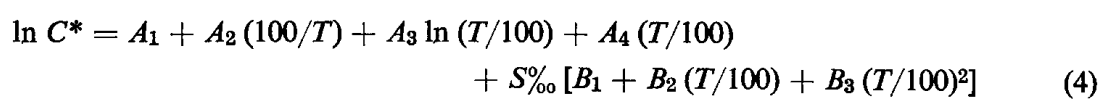

Where C* is gas solubility in moles (STP)/L or moles (STP)/kg, with water saturated air at total pressure of 1atm. The A’s and B’s are constants to be calculated using empirical data, with B’s as salting-out constants. T is temperature in kelvins and S‰ for salinity in parts per thousand. 
 
This equation was again used by Weiss (1974) to fit the solubility of gases, but this time focusing on $CO_{2}$ solubility in water and seawater. The general equation he used was:

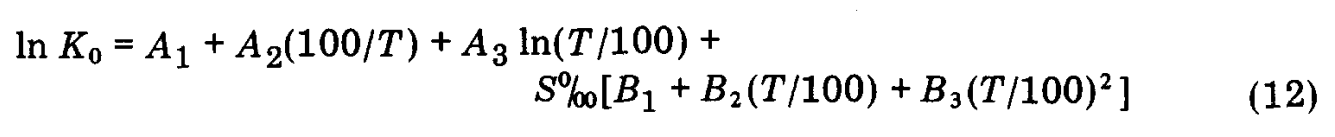

Where K0 is the solubility coefficient expressed in moles/1 • atm or moles/kg • atm, and the other definitions remain the same as that of the above general equation. The corrected data from Murray and Riley (1971), whose measurements were considered highly accurate based on new data then on $CO_{2}$ solubility in water and seawater, was used. The data was fitted to the equation and the A and B constants were found as shown in Table 1. 


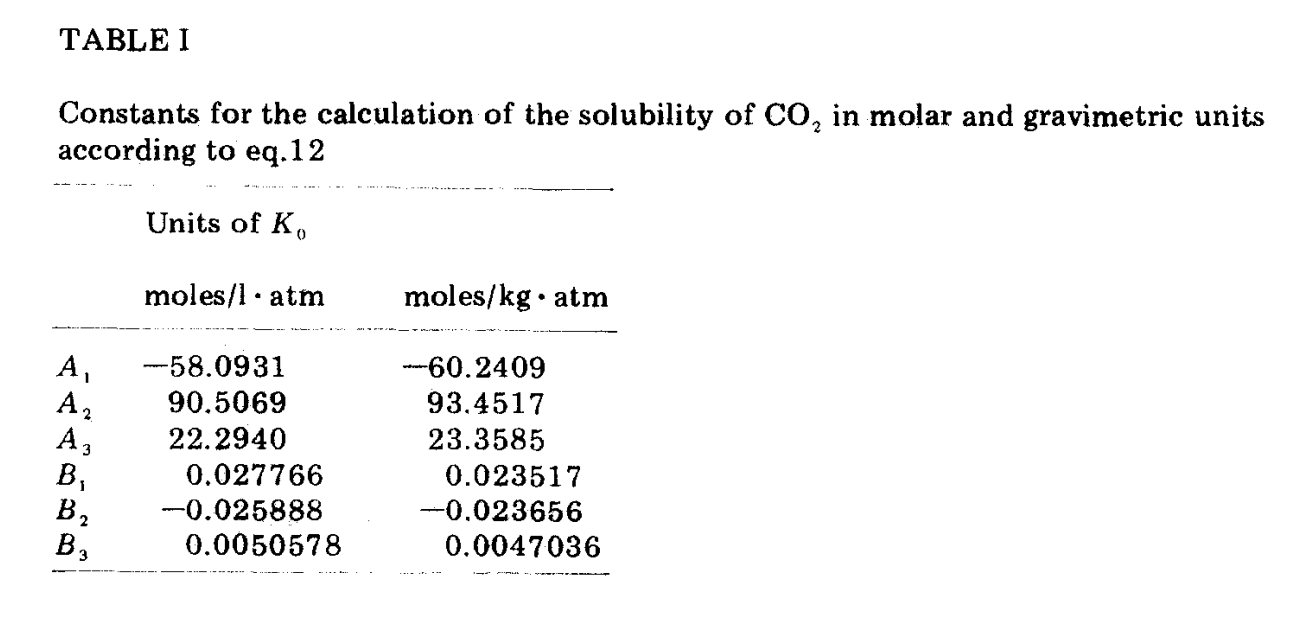

We will be using the $K_{0}$ values for the units moles/l • atm in this project, thus, the equation where $K_{0}$ is a function of temperature and salinity is as shown:

$K_{0}$ = $e^{-58.0931 + 90.5069 (100/T) + 22.2940 ln(T/100) + s‰ (0.027766 - 0.025888 (T/100) + 0.0050578 (T/100)^{2}}$       (Eqn. 12)


The aim of our project is to use the values calculated from the fitted equation, Eqn. 12, to break the equation down further to identify potential equations which only involve one of the parameters, temperature or salinity.
 
To do so,  we would be plotting graphs to compare the data and only compare the solubility coefficient with one parameter at a time - solubility coefficient against temperature, and solubility coefficient against salinity. We will be using python packages such as matplotlib, numpy and pandas.
 
For the purpose of this project, we will make the assumption that NaCl salt solution represents seawater. While we do recognise that seawater contains a multitude of other ions such as $Mg{2+}$, $SO_{4}^{2-}$, $K^{+}$ and $Ca^{2+}$ ions, our assumption is warranted as it serves to simplify the model. $Cl^{-}$ and $Na^{+}$ are the most prevalent ions in seawater, making up an estimated 85% of all dissolved ions in the ocean, with other ions being found in very low concentrations (National Ocean Service, n.d.)
 
We have chosen to plot solubility coefficient against temperature by using data points where S‰ = 35. The reason for this is that the average salinity of seawater is about 35 ‰, which can serve as a more accurate generalisable model to predict atmospheric $CO_{2}$ dissolving in seawater (U.S. Geological Survey, n.d.)
 
We have also chosen to plot solubility coefficient against salinity by using data points where T = 20 °C and T = 30 °C. The reason for this is that the average temperature of surface seawater is about 20 °C, and can fluctuate to over 30 °C depending on weather conditions (Roemmich, 2014).


In [1]:
# Some packages to import
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Obtaining necessary data points (at s‰ = 35) to prepare for plotting

In [85]:
# Using a csv file containing K_0/solubility coefficient values at s‰ = 35 
# Data used to plot solubility coefficient aganist temperature

sol_temp_url = "https://raw.githubusercontent.com/Lo-mh/SP2273-CodeX-Project/main/temp(degC)_solubility_final.csv"
df_sol_vs_temp = pd.read_csv(sol_temp_url)

df_sol_vs_temp

,Temperature (℃),Solubility coefficient (mol/L·atm)
0,-1,6.724
1,0,6.465
2,1,6.219
3,2,5.986
4,3,5.766
5,4,5.557
6,5,5.358
7,6,5.170
8,8,4.822
9,10,4.507


#### Using the dataframe df_sol_vs_temp, the scatter plot of $K_{0}$ against temperature at 35 ‰ salinity can be plotted

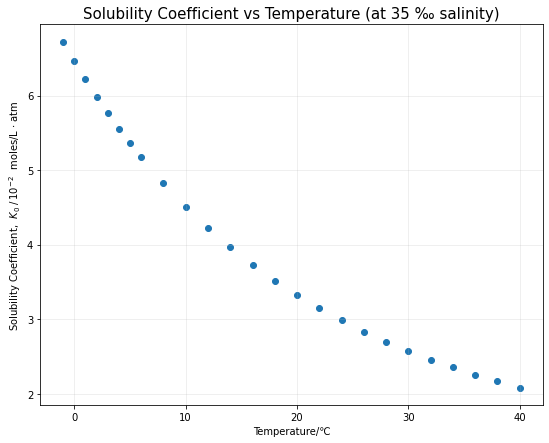

In [60]:
#Solubility against salinity scatter plot

x = df_sol_vs_temp.iloc[:, 0].values.reshape(-1, 1)
y = df_sol_vs_temp.iloc[:, 1].values.reshape(-1, 1)

plt.figure(figsize=(9, 7))
plt.scatter(x, y)

# Some customisations
plt.xlabel('Temperature/\u2103', size=10)
plt.ylabel('Solubility Coefficient, '+r' $K_0\:/\:10^{-2}$ '+' moles/L $\cdot$ atm', size=10)
plt.title('Solubility Coefficient vs Temperature (at 35 ‰ salinity)', size=15)
plt.grid(alpha=.25)

plt.show()

#### Eqn. 12 is also plotted to show that each data point is derived from the equation

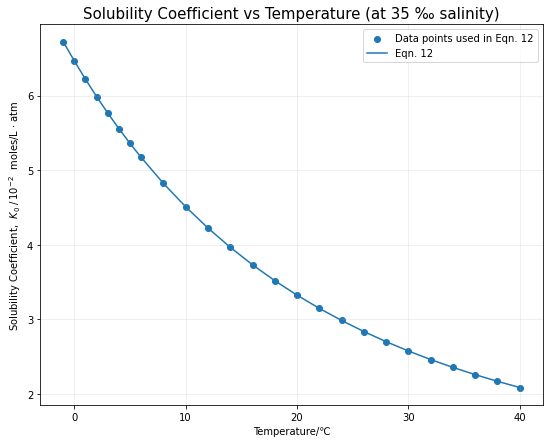

In [86]:
# Previous scatter plot with Eqn. 12 curve

from numpy import log as ln

x = df_sol_vs_temp.iloc[:, 0].values.reshape(-1, 1)
y = df_sol_vs_temp.iloc[:, 1].values.reshape(-1, 1)

plt.figure(figsize=(9, 7))
plt.scatter(x, y, label='Data points used in Eqn. 12')

y_eqn_12 = (np.e**((-58.0931) + 90.5069*(100/(x+273.15)) + 22.2940*ln((x+273.15)/100) +
            35*(0.027766 - 0.025888*((x+273.15)/100) + 0.0050578*((x+273.15)/100)**2 )))*100  

# Based on the Eqn. 12, T is in kelvin, however the temperature values used here are in °C
# So, 273.15 is added to each x to ensure that the equation can use °C data.
# Also, each value of y_eqn_12 are multiplied by 100 to ensure the solubility coefficient (K_0) is in terms of 10^(-2) when plotting 

plt.plot(x,y_eqn_12, label='Eqn. 12')

plt.xlabel('Temperature/\u2103', size=10)
plt.ylabel('Solubility Coefficient, '+r' $K_0\:/\:10^{-2}$ '+' moles/L $\cdot$ atm', size=10)
plt.title('Solubility Coefficient vs Temperature (at 35 ‰ salinity)', size=15)
plt.grid(alpha=.25)
plt.legend(loc='upper right', prop={'size': 10})

plt.show()

### Moving on to obtain necessary data points (at temperature = 20 °C, 30 °C) for plotting

In [6]:
# Using a csv file containing K_0/solubility coefficient values at 20 °C and 30 °C 
# Data used to plot solubility coefficient aganist salinity

sol_salinity_url = "https://raw.githubusercontent.com/Lo-mh/SP2273-CodeX-Project/main/Solubility%20VS%20Salinity%20(Temperature%20%3D%2020%C2%B0C%2C%2030%C2%B0C).csv"
df_sol_vs_salinity = pd.read_csv(sol_salinity_url)

df_sol_vs_salinity

,Salinity (‰),Solubility coefficient at 293.15K (mol/L·atm),Solubility coefficient at 303.15K (mol/L·atm)
0,0,3.910,2.983
1,10,3.732,2.859
2,20,3.562,2.741
3,30,3.400,2.627
4,34,3.337,2.583
5,35,3.322,2.572
6,36,3.306,2.561
7,38,3.275,2.540
8,40,3.245,2.518


#### Using the dataframe df_sol_vs_salinity, $K_{0}$ against salinity at 20 °C and 30 °C can be plotted

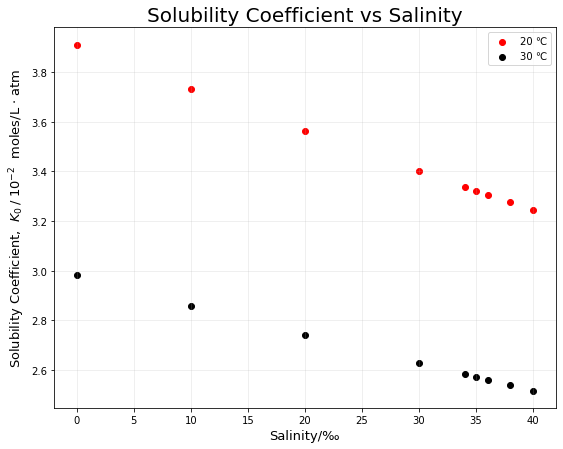

In [87]:
#Solubility against salinity scatter plot

x = df_sol_vs_salinity.iloc[:, 0].values.reshape(-1, 1)  
y_1 = df_sol_vs_salinity.iloc[:, 1].values.reshape(-1, 1)  
y_2 = df_sol_vs_salinity.iloc[:, 2].values.reshape(-1, 1)

plt.figure(figsize=(9, 7))
plt.scatter(x, y_1, color='red', label='20 \u2103')
plt.scatter(x, y_2, color='black', label='30 \u2103')

plt.xlabel('Salinity/‰', size=13)
plt.ylabel('Solubility Coefficient, '+r' $K_0\:/\:10^{-2}$ '+' moles/L $\cdot$ atm', size=13)
plt.title('Solubility Coefficient vs Salinity', size=20)
plt.grid(alpha=.25)
plt.legend(loc='upper right', prop={'size': 10})

plt.show()

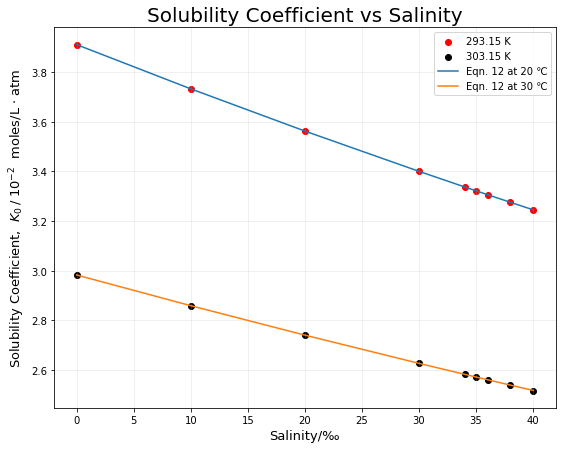

In [88]:
x = df_sol_vs_salinity.iloc[:, 0].values.reshape(-1, 1)  
y_1 = df_sol_vs_salinity.iloc[:, 1].values.reshape(-1, 1)  
y_2 = df_sol_vs_salinity.iloc[:, 2].values.reshape(-1, 1)

plt.figure(figsize=(9, 7))
plt.scatter(x, y_1, color='red', label='293.15 K')
plt.scatter(x, y_2, color='black', label='303.15 K')



y_eqn_12_20_deg = (np.e**((-58.0931) + 90.5069*(100/293.15) + 22.2940*ln(293.15/100) +
                          x*(0.027766 - 0.025888*(293.15/100) + 0.0050578*(293.15/100)**2 )))*100
# 273.15 is added to temperature = 20 °C, so T = 20 + 273.15 = 293.15

y_eqn_12_30_deg = (np.e**((-58.0931) + 90.5069*(100/303.15) + 22.2940*ln(303.15/100) +
                          x*(0.027766 - 0.025888*(303.15/100) + 0.0050578*(303.15/100)**2 )))*100   
# 273.15 is added to temperature = 30 °C, so T = 20 + 273.15 = 303.15

plt.plot(x, y_eqn_12_20_deg, label='Eqn. 12 at 20 \u2103')
plt.plot(x, y_eqn_12_30_deg, label='Eqn. 12 at 30 \u2103')

# Some customisations
plt.xlabel('Salinity/‰', size=13)
plt.ylabel('Solubility Coefficient, '+r' $K_0\:/\:10^{-2}$ '+' moles/L $\cdot$ atm', size=13)
plt.title('Solubility Coefficient vs Salinity', size=20)
plt.grid(alpha=.25)
plt.legend(loc='upper right', prop={'size': 10})

plt.show()

## Plotting of best fit curve

Since the Eqn. 12 used exponential to find the solubility coefficient, we thought of doing the same by finding best fit curves using exponential equation as well. 

Also, more apparent for the solubility coefficient against temperature graph, the graphs showed something similar to an exponential decay graph.

In [9]:
#Setting up
from scipy.optimize import curve_fit

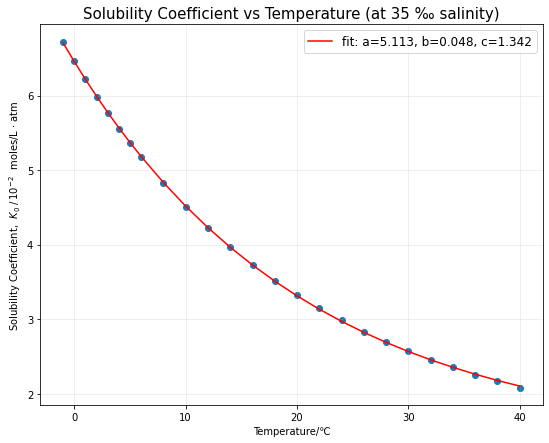

In [79]:
x = df_sol_vs_temp.iloc[:, 0].values.reshape(-1, 1)
y = df_sol_vs_temp.iloc[:, 1].values.reshape(-1, 1)

plt.figure(figsize=(9, 7))
plt.scatter(x, y)

# Some customisations
plt.xlabel('Temperature/\u2103', size=10)
plt.ylabel('Solubility Coefficient, '+r' $K_0\:/\:10^{-2}$ '+' moles/L $\cdot$ atm', size=10)
plt.title('Solubility Coefficient vs Temperature (at 35 ‰ salinity)', size=15)
plt.grid(alpha=.25)


def func(x_1, a, b, c):
    return a * np.exp(-b * x_1) + c

x = np.array(x).flatten()
y = np.array(y).flatten()

popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))    

plt.legend(loc='upper right', prop={'size': 12})
plt.show()

#### The equation of the best fit exponential curve for $K_{0}$ against temperature (at 35 ‰ salinity) is found be:
$5.113(e^{-0.048 x}) + 1.342$

C:\Users\yyccg\AppData\Local\Temp/ipykernel_2240/2828483199.py:18: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x_1) + c
C:\Users\yyccg\AppData\Local\Temp/ipykernel_2240/2828483199.py:18: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x_1) + c


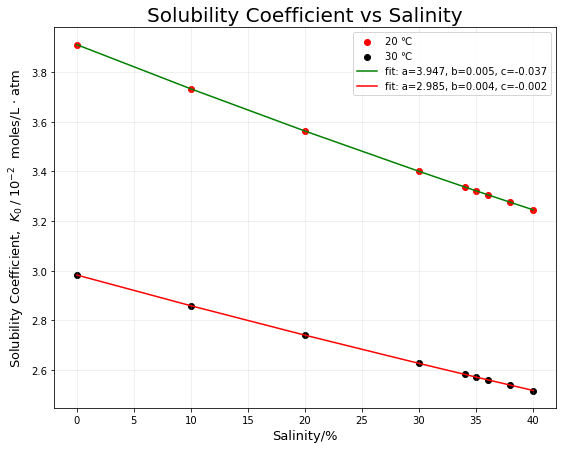

In [78]:
#Finding best fit curve (solubility vs salinity)

x = df_sol_vs_salinity.iloc[:, 0].values.reshape(-1, 1)  
y_1 = df_sol_vs_salinity.iloc[:, 1].values.reshape(-1, 1)  
y_2 = df_sol_vs_salinity.iloc[:, 2].values.reshape(-1, 1)

plt.figure(figsize=(9, 7))
plt.scatter(x, y_1, color='red', label='20 \u2103')
plt.scatter(x, y_2, color='black', label='30 \u2103')

# Some customisations
plt.xlabel('Salinity/%', size=13)
plt.ylabel('Solubility Coefficient, '+r' $K_0\:/\:10^{-2}$ '+' moles/L $\cdot$ atm', size=13)
plt.title('Solubility Coefficient vs Salinity', size=20)
plt.grid(alpha=.25)

def func(x_1, a, b, c):
    return a * np.exp(-b * x_1) + c

x = np.array(x).flatten()
y_1 = np.array(y_1).flatten()
y_2 = np.array(y_2).flatten()

popt, pcov = curve_fit(func, x, y_1)
plt.plot(x, func(x, *popt), 'g-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, x, y_2)
plt.plot(x, func(x, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.legend(loc='upper right', prop={'size': 10})
plt.show()

#### The equation of the best fit exponential curve for $K_{0}$ against salinity (20 °C) is found be:
$3.947(e^{-0.005 x}) - 0.037$

#### The equation of the best fit exponential curve for $K_{0}$ against salinity (30 °C) is found be:
$2.985(e^{-0.004 x}) - 0.002$

## Model Evaluation using standard error of regression

#### What is standard error of regression?
We will be using the statistical method, standard error of regression (S), to evaluate the model.

The standard error of regression is an important goodness-of-fit measure for regression analysis. It refers to the average distance between the data points and the regression graph. Although there is no standard value of S that indicates a good fit, the smaller the value of S, the closer the values are to the regression line. (Frost, 2021.)

#### Why choose standard error of regression?
We chose standard error of regression over the coefficient of determination,  R² as the standard error of regression can be used to analyse the values for both linear and non-linear regression, while R² functions on the assumption that the model for fitting is linear. R² provides a relative measure of how much variation of a dependent variable is explained by the independent variable in a regression model. The standard error of regression provides more useful information about the model as it provides an absolute measure of the average distance the data points from the regression line (Frost, 2021). 



In [90]:
#K_0 vs temp

T = np.array(df_sol_vs_temp.iloc[:, 0])

K_0_temp_array = (5.113 * np.exp(-0.048 * T) + 1.342)
    
K_0_temp_array

array([6.70640956, 6.455     , 6.21537305, 5.98697651, 5.76928406,
       5.56179402, 5.36402825, 5.17553102, 4.82462499, 4.50583948,
       4.21623432, 3.95313846, 3.71412533, 3.4969905 , 3.29973133,
       3.12052846, 2.95772911, 2.80983176, 2.67547233, 2.55341163,
       2.44252387, 2.34178634, 2.25026991, 2.16713053, 2.0916014 ])

In [82]:
#std error (temperature)
import statsmodels.api as sm
import math

y = K_0_temp_array
t = np.array(df_sol_vs_temp.iloc[:, 0])
t = sm.add_constant(t, prepend=False)

model = sm.OLS(y,t)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     395.4
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           5.48e-16
Time:                        14:26:14   Log-Likelihood:                -9.1065
No. Observations:                  25   AIC:                             22.21
Df Residuals:                      23   BIC:                             24.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1116      0.006    -19.885      0.000      -0.123      -0.100
const          5.9363      0.120     49.296      0.000       5.687       6.185
==============================================================================
Omnibus:                        3.895   Durbin-Watson:                   0.076
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                1.930
Skew:                           0.382   Prob(JB):                        0.381
Kurtosis:                       1.874   Cond. No.                         35.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#K_0 vs salinity (at 20 °C)
S = np.array(df_sol_vs_salinity.iloc[:, 0])

K_0_salinity_array_20_deg = 3.947 * np.exp(-0.005 * S) -0.037
    
K_0_salinity_array_20_deg

array([3.91      , 3.71750254, 3.53439329, 3.36021438, 3.29294503,
       3.27633686, 3.25981152, 3.2270077 , 3.19453028])

In [49]:
#std error (salinity, at 20 °C)
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math

y = K_0_salinity_array_20_deg
s = np.array(df_sol_vs_salinity.iloc[:, 1])
s = sm.add_constant(s, prepend=False)

model = sm.OLS(y,s)
result = model.fit()
result.summary()

C:\Users\yyccg\miniconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.510e+06
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           6.25e-20
Time:                        12:01:11   Log-Likelihood:                 55.541
No. Observations:                   9   AIC:                            -107.1
Df Residuals:                       7   BIC:                            -106.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0756      0.001   1228.631      0.000       1.074       1.078
const         -0.2963      0.003    -97.784      0.000      -0.303      -0.289
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                0.985
Skew:                           0.211   Prob(JB):                        0.611
Kurtosis:                       1.435   Cond. No.                         59.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#K_0 vs salinity (at 30 °C)
S = np.array(df_sol_vs_salinity.iloc[:, 0])

K_0_salinity_array_30_deg = 2.985 * np.exp(-0.004 * S) -0.002
    
K_0_salinity_array_30_deg

array([2.983     , 2.86595648, 2.75350229, 2.6454575 , 2.60343526,
       2.59303433, 2.58267493, 2.56208002, 2.54164921])

In [51]:
#std error (salinity, at 30 °C)
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math

y = np.array(K_0_salinity_array_30_deg)
s = np.array(df_sol_vs_salinity.iloc[:, 2])
s = sm.add_constant(s, prepend=False)

model = sm.OLS(y,s)
result = model.fit()
result.summary()

C:\Users\yyccg\miniconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.181e+06
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           1.72e-20
Time:                        12:01:30   Log-Likelihood:                 61.539
No. Observations:                   9   AIC:                            -119.1
Df Residuals:                       7   BIC:                            -118.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9498      0.001   1476.907      0.000       0.948       0.951
const          0.1500      0.002     87.400      0.000       0.146       0.154
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   2.367
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.562
Skew:                          -0.559   Prob(JB):                        0.755
Kurtosis:                       2.501   Cond. No.                         53.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What does the standard error obtained tell us about the graphs?
Comparison between trend of calculated data points and Eqn. 12
(for Solubility vs temperature)
The graph obtained is an exponential decay graph, and the regression line was obtained through exponential regression. An exponential relationship occurs when the rate of change of the variable depends on the variable itself. The general trend of the graph seems to indicate that the solubility coefficient of carbon dioxide would stabilise over time as temperature increases. The stabilisation of the value of the solubility coefficient occurs at the asymptote of the exponential decay graph. 

#### Why is Eqn. 12 not a negative exponential, yet a negative exponential equation can fit the data points quite well?
Based on Eqn. 12, it is clear that the exponential equation is non-negative. However, as the value of temperature increases, the value of the exponent decreases, causing the correlation coefficient value to decrease with temperature. This general trend can also be observed in a negative exponential equation, since the exponent will also decrease as temperature increases.


The calculated values from Eqn. 12 seem to follow a negative exponential trend. An exponential relationship suggests that the rate of change of the variable (salinity of the solvent) depends on the salinity itself. The general trend of the graph indicates that the solubility coefficient of carbon dioxide decreases as salinity increases. The gradient of the exponential graph is similar even at different values of salinity, almost resembling the constant gradient of a straight-line graph. This indicates that the change in salinity is fairly proportional to the solubility coefficient of carbon dioxide. 
The trend of the calculated values compares well with the graph represented by Eqn. 12. This indicates that the equation obtained from exponential regression agrees well with Eqn. 12. A possible explanation could be that the effect of salinity on the carbon dioxide solubility has been well-established, with the negative relationship between salinity and solubility being discussed by multiple researchers (Zhang et al., 2016) 


# Conclusion and future work

The graphs obtained are promising as it suggests that these fitted equations can potentially be used to predict solubility of carbon dioxide given the temperature or salinity of the seawater. The low values of the standard error of regression obtained from the graph, indicate that there is good precision with the predictions of the solubility coefficient of carbon dioxide. Predicting the solubility coefficient of carbon dioxide, allows for a quantitative measurement of the ocean acidification. This in turn allows for a mathematical assessment of the severity of ocean acidification which could provide information for relevant stakeholders such as scientists to take necessary mitigation measures. 

As an extension, the effect of various dependent variables that was analysed individually in this project could be studied in conjunction with one another. The interactions of Multiple factors such as temperature, salinity, pressure can have a combined effect against the solubility coefficient of carbon dioxide which would be able to better account for the relationships of these variables in the real world (Mentzer, 2019). 

# References

1. Bando, S., Takemura, F., Nishio, M., Hihara, E., & Akai, M. (2003). Solubility of co 2 in aqueous solutions of nacl at (30 to 60) °c and (10 to 20) mpa. Journal of Chemical & Engineering Data, 48(3), 576–579. https://doi.org/10.1021/je0255832

2. Byrne, R. H. (2014). Measuring ocean acidification: new technology for a new era of ocean chemistry.https://pubs.acs.org/doi/pdf/10.1021/es405819p
https://www.noaa.gov/education/resource-collections/ocean-coasts/ocean-acidification

3. Cristen Hemingway Jaynes · EcoWatch, Mongabay, L., Rodrigues, J., Conversation, P., Kim Harrisberg · Thomson Reuters Foundation trust.org, & Georgieva, K. (2020, February 03). Climate change is acidifying the ocean at an alarming rate - and these animals are worst affected. Retrieved April 1, 2022, from https://www.weforum.org/agenda/2020/02/crabs-shells-dissolving-effects-of-ocean-acidification-climate-change#:~:text=Crustaceans%20and%20corals%20need%20carbonate,weakens%20plankton%2C%20as%20CNN%20reported

4. Frost, J., Maria, LKC33, García, S., Matthew, LaPlume, A., . . . Neog, Y. (2021, November 12). Standard error of the regression vs. R-squared. Retrieved April 1, 2022, from https://statisticsbyjim.com/regression/standard-error-regression-vs-r-squared/

5. Mentzer, A. (2019, March 02). How does temperature affect barometric pressure? Retrieved April 1, 2022, from https://sciencing.com/temperature-affect-barometric-pressure-5013070.htm

6. Ocean acidification. (2021, May 11). Retrieved April 1, 2022, from https://www.eea.europa.eu/data-and-maps/indicators/ocean-acidification-1/assessment

7. Voyager: How long until ocean temperature goes up a few more degrees? (2014, March 18). Retrieved April 1, 2022, from https://scripps.ucsd.edu/news/voyager-how-long-until-ocean-temperature-goes-few-more-degrees#:~:text=The%20average%20temperature%20of%20the,becomes%20colder%20with%20increasing%20depth

8. Weiss, R. (1974, August). Carbon dioxide in water and seawater: the solubility of a non-ideal gas. Marine chemistry, 2(3), 203-215. https://www.sciencedirect.com/science/article/abs/pii/0304420374900152

9. Weiss, R. F. (1970, January). The solubility of nitrogen, oxygen and argon in water and seawater. In Deep Sea Research and Oceanographic Abstracts (Vol. 17, No. 4, pp. 721-735). Elsevier. https://www.sciencedirect.com/science/article/abs/pii/0011747170900379
 
10. Zhang, Y., Lashgari, H., Sepehrnoori, K., & Di, Y. (2016, December 29). Effect of capillary pressure and salinity on CO2 solubility in brine aquifers. Retrieved April 1, 2022, from https://www.sciencedirect.com/science/article/pii/S1750583616309495